In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
# 1. Załadowanie zbioru danych irysów
iris = datasets.load_iris()
X = iris.data[:, 1:]  # Używamy wszystkich cech oprócz "sepal length"
y = iris.data[:, 0]   # Długość działki kielicha ("sepal length") jako wartość docelowa
flower_class = iris.target.reshape(-1, 1)  # Klasa kwiatu (Setosa, Versicolor, Virginica)


In [14]:
# 2. Wstępne przetwarzanie danych

encoder = OneHotEncoder(sparse_output=False)
flower_encoded = encoder.fit_transform(flower_class)

# 3. Połączenie cech numerycznych i zakodowanej klasy kwiatu
X_combined = np.hstack((X, flower_encoded))

# Normalizacja cech (standaryzacja)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)

# Podział na zbiory treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [15]:
# # 3. Budowa modelu sieci neuronowej
# model = Sequential([
#     Dense(8, input_dim=6, activation='relu'),   # Warstwa wejściowa + 1 warstwa ukryta
#     Dense(1)              # Warstwa wyjściowa z funkcją aktywacji softmax
# ])

In [16]:
# 3. Budowa modelu sieci neuronowej do regresji
model = Sequential([
    Dense(16, input_dim=6, activation='relu'),      # Pierwsza warstwa ukryta z 16 neuronami
    BatchNormalization(),                           # Normalizacja wsadowa
    Dropout(0.2),                                   # Dropout z 20% prawdopodobieństwem
    
    Dense(32, activation='relu'),                   # Druga warstwa ukryta z 32 neuronami
    BatchNormalization(),                           # Normalizacja wsadowa
    Dropout(0.3),                                   # Dropout z 30% prawdopodobieństwem
    
    Dense(16, activation='relu'),                   # Trzecia warstwa ukryta z 16 neuronami
    BatchNormalization(),                           # Normalizacja wsadowa
    Dropout(0.2),                                   # Dropout z 20% prawdopodobieństwem
    
    Dense(1)                                        # Warstwa wyjściowa do regresji
])

/home/aleksander.kolodziej@A4BEE.ad/Desktop/lab--AI-ML--szkolenie--olson/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# 4. Kompilacja modelu
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [18]:
# Wyświetlenie struktury modelu
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 16)             │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,457 (5.69 KB)

 Trainable params: 1,329 (5.19 KB)

 Non-trainable params: 128 (512.00 B)

In [19]:
# 5. Trenowanie modelu
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=300, 
                    batch_size=20, 
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/300


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 36.9027 - mean_absolute_error: 5.8477 - val_loss: 31.8216 - val_mean_absolute_error: 5.5905
Epoch 2/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 37.1241 - mean_absolute_error: 5.8185 - val_loss: 31.6665 - val_mean_absolute_error: 5.5801
Epoch 3/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 33.8992 - mean_absolute_error: 5.6183 - val_loss: 31.5363 - val_mean_absolute_error: 5.5705
Epoch 4/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 34.9612 - mean_absolute_error: 5.7376 - val_loss: 31.2097 - val_mean_absolute_error: 5.5431
Epoch 5/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 33.8200 - mean_absolute_error: 5.6646 - val_loss: 30.8232 - val_mean_absolute_error: 5.5103
Epoch 6/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 33.9288 - mean_absolute_error: 5.6710 - val_loss: 30.5126 - val_mean_absolute_error: 5.4848
Epoch 7/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 33.4410 - mean_absolute_error: 5.6184 - val_loss: 30.1987 - 

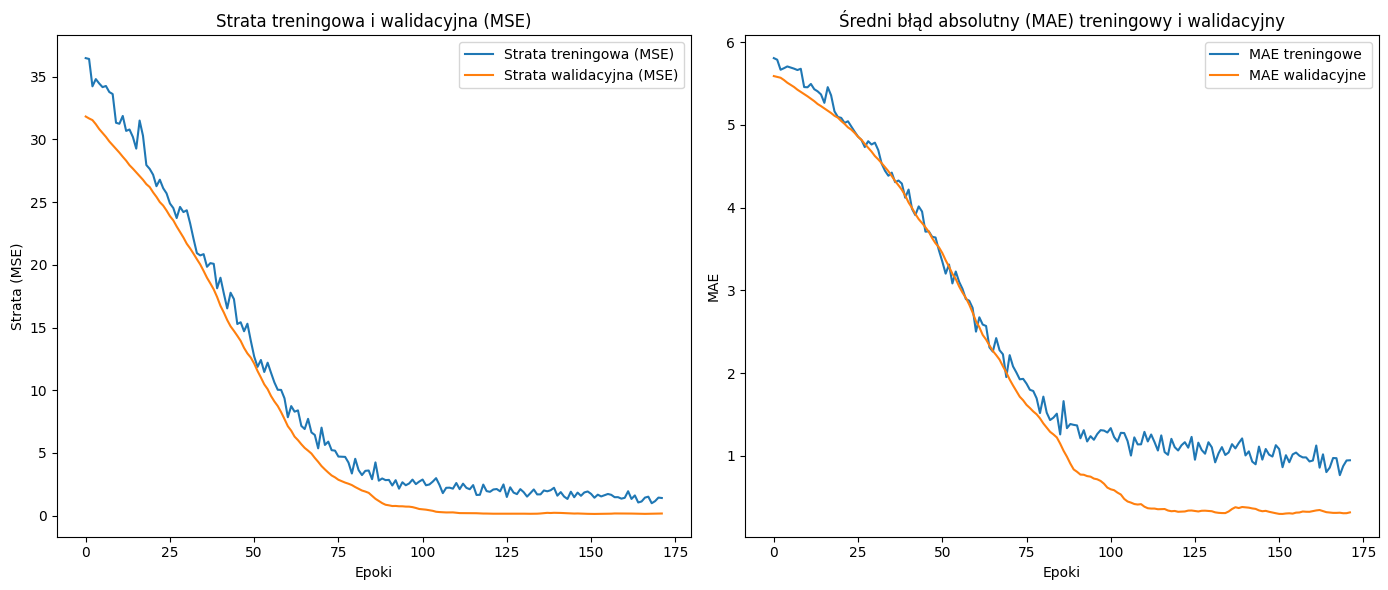

In [20]:
# 6. Wizualizacja wyników

# Wykres strat treningowych i walidacyjnych
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Strata treningowa (MSE)')
plt.plot(history.history['val_loss'], label='Strata walidacyjna (MSE)')
plt.xlabel('Epoki')
plt.ylabel('Strata (MSE)')
plt.legend()
plt.title('Strata treningowa i walidacyjna (MSE)')

# Wykres MAE (Mean Absolute Error) treningowej i walidacyjnej
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='MAE treningowe')
plt.plot(history.history['val_mean_absolute_error'], label='MAE walidacyjne')
plt.xlabel('Epoki')
plt.ylabel('MAE')
plt.legend()
plt.title('Średni błąd absolutny (MAE) treningowy i walidacyjny')

plt.tight_layout()
plt.show()

In [21]:
# 7. Ocena modelu na zbiorze testowym
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Strata modelu na zbiorze testowym (MSE): {test_loss:.4f}')
print(f'Średni błąd absolutny (MAE) na zbiorze testowym: {test_mae:.4f}')

Strata modelu na zbiorze testowym (MSE): 0.1386
Średni błąd absolutny (MAE) na zbiorze testowym: 0.2996


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
RMSE: 0.3722
MAE: 0.2996


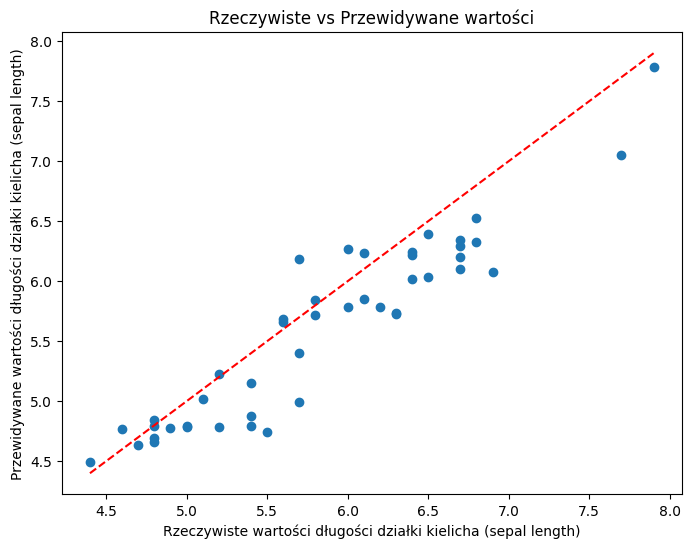

In [22]:
# 8. Przewidywanie i ocena
y_pred = model.predict(X_test)

# Obliczenie RMSE (Root Mean Squared Error) i MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')

# Wizualizacja przewidywań w porównaniu z rzeczywistymi wartościami
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Rzeczywiste wartości długości działki kielicha (sepal length)')
plt.ylabel('Przewidywane wartości długości działki kielicha (sepal length)')
plt.title('Rzeczywiste vs Przewidywane wartości')
plt.show()